## **Instação de bibliotecas**

Bibliotecas necessárias:


* Numpy
* Pandas
* Seaborn
* Matplotlib
* Scikit-Learn

Comando:

`!pip install numpy pandas scikit-learn matplotlib seaborn`


## Importa dependências

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

## Criação de dataset
*   Criação de conjunto de dados (aleatórios) + calculo de encargos com base nos dados inseridos previamente. (É possivel tambem subir seu proprio arquivo, deste que este respeite a configuração dos dados de entrada expostos no código. A inclusão do path do arquivo diretamente no código pode ser necessária)

In [57]:
df = pd.DataFrame()
df_size = 10000

df["idade"] = np.random.randint(18, 90, size=df_size) # Idade entre 18 e 90 anos
df["genero"] = np.random.choice(["masculino", "feminino"], size=df_size) # Gênero masculino ou feminino
df["imc"] = np.random.randint(120, 500, size=df_size) / 10 # Indice de massa corpórea da pessoa
df["filhos"] = np.random.randint(0, 5, size=df_size) # Quantidade de filhos que a pessoa possui
df["fumante"] = np.random.choice(["sim", "não"], size=df_size) # Fumante ou não fumante
df["regiao"] = np.random.choice(["norte", "nordeste", "centro-oeste", "sul", "sudeste"], size=df_size) # Gênero masculino ou feminino

# Calcula os encargos de cada pessoa com base nos dados informados anteriormente

# Calculo base
df["encargos"] = (

        # IDADE
        df["idade"] * 80.33

        # IMC
        + df["imc"] * 255.52
)

# Multiplicadores
df["encargos"] = df["encargos"] + (

      # GÊNERO
      + np.where(df["genero"] == 'masculino', df["encargos"] * 0.1, 0) # Homens possuem maior taxa de mortalidade

      # FILHOS
      + np.where((df["genero"] == 'feminino') & (df["filhos"] > 0), df["encargos"] * 0.05, 0) # Mulheres que ja tiveram filhos possuem uma tendencia maior a aparição de sintomas de saúde

      # FUMANTE
      + np.where(df["fumante"] == 'sim', df["encargos"] * 0.5, 0) # Individuos fumantes apresentam um enorme acrescimo na taxa de aparição de sintomas de saúde

      # REGIÃO
      + np.where(df["regiao"].isin(["sul", "sudeste"]), df["encargos"] * 0.2, 0) # Regiões sul e sudeste possuem hospitais mais caros
)

print(df)

# Exporta arquivo com dados amostrais
# df.to_csv(r'/content/drive/MyDrive/Colab Notebooks/Data/custos_medicos_individuais.csv', index = False)

      idade     genero   imc  filhos fumante        regiao    encargos
0        50  masculino  16.8       0     não      nordeste   9140.1596
1        32  masculino  48.4       3     sim         norte  23900.3648
2        35  masculino  29.5       2     não      nordeste  11384.3290
3        62   feminino  27.5       2     não         norte  12607.6230
4        48   feminino  19.5       3     não  centro-oeste   9280.4040
...     ...        ...   ...     ...     ...           ...         ...
9995     24   feminino  17.7       4     não         norte   6773.1552
9996     85  masculino  41.6       2     não  centro-oeste  19203.4502
9997     60   feminino  13.4       2     não       sudeste  10304.7100
9998     64  masculino  39.2       1     sim      nordeste  24252.0064
9999     33   feminino  23.1       3     sim  centro-oeste  13257.7731

[10000 rows x 7 columns]


## 1. Exploração de dados

*   Carregamento da base de dados e exploração suas características.           
*   Analise estatística descritiva e visualização de distribuições relevantes.



Dados importados:
      idade     genero   imc  filhos fumante        regiao    encargos
0        50  masculino  16.8       0     não      nordeste   9140.1596
1        32  masculino  48.4       3     sim         norte  23900.3648
2        35  masculino  29.5       2     não      nordeste  11384.3290
3        62   feminino  27.5       2     não         norte  12607.6230
4        48   feminino  19.5       3     não  centro-oeste   9280.4040
...     ...        ...   ...     ...     ...           ...         ...
9995     24   feminino  17.7       4     não         norte   6773.1552
9996     85  masculino  41.6       2     não  centro-oeste  19203.4502
9997     60   feminino  13.4       2     não       sudeste  10304.7100
9998     64  masculino  39.2       1     sim      nordeste  24252.0064
9999     33   feminino  23.1       3     sim  centro-oeste  13257.7731

[10000 rows x 7 columns]

Caracteristicas dos dados:
              idade           imc        filhos      encargos
count  10000.

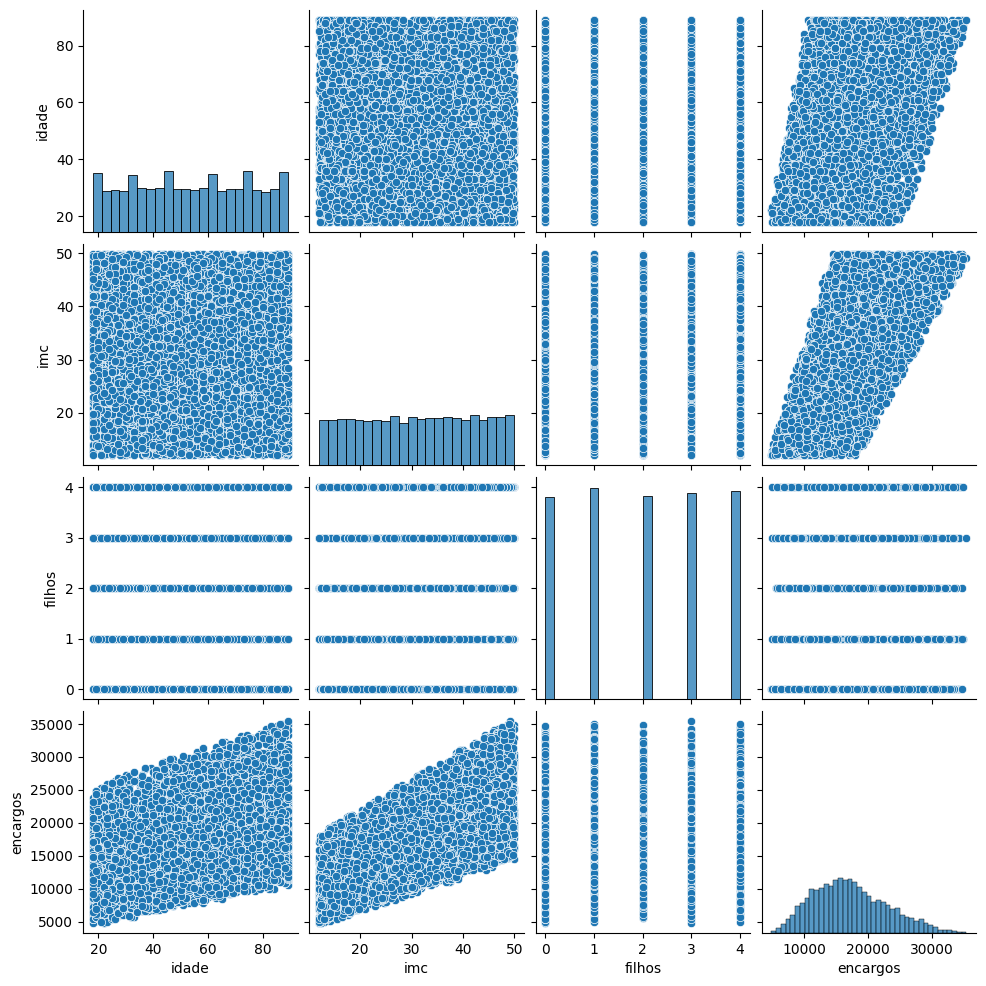

In [58]:
# Importa arquivo com os dados amostrais
# df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Data/custos_medicos_individuais.csv')

print("\nDados importados:")
print(df)

print("\nCaracteristicas dos dados:")
print(df.describe())

print("\nCorrelação dos dados:")

sns.pairplot(df)
plt.show()

# print("\n")

# sns.heatmap(df[["idade", "imc", "encargos"]].corr(), annot=True, cmap='coolwarm')
# plt.show()

## 2. Pré-processamento dos dados

* Limpeza dos dados.
* Conversão de variáveis categóricas em formatos adequados para modelagem, utilizando o modelo One Hot Encoder.

In [59]:
print("Pré-processando dados...")
df.dropna(inplace=True) # Remove registros com valores nulos

colunas_categoricas = ["genero", "fumante", "regiao"]
colunas_numericas = [coluna for coluna in df.columns if coluna not in colunas_categoricas]

print(f"Variáveis categórias: {colunas_categoricas}")
print(f"Variáveis numéricas: {colunas_numericas}")

encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(
      encoder.fit_transform(df[colunas_categoricas]),
      columns=encoder.get_feature_names_out(colunas_categoricas)
)

df = pd.concat([df[colunas_numericas], encoded_df], axis=1)

Pré-processando dados...
Variáveis categórias: ['genero', 'fumante', 'regiao']
Variáveis numéricas: ['idade', 'imc', 'filhos', 'encargos']


## 3. Modelagem

* Criação de modelos preditivos de Regressão Linear e Árvore de Decisão
* Divisão do conjunto de dados em conjuntos de treinamento e teste

In [60]:
# Modelo de Regressão Linear
modelo_lr = LinearRegression()

# Modelo de regressão Árvore de Decisão
modelo_dtr = DecisionTreeRegressor()

# Normalização dos dados
x = df.drop('encargos', axis=1)
y = df['encargos']

x_scaled = StandardScaler().fit_transform(x)
y_scaled = StandardScaler().fit_transform(y.values.reshape(-1, 1))

# Separação dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

## 4. Treinamento e avaliação do modelo

In [61]:
# Treinamento e predição de modelo de Regressão linear
modelo_lr.fit(x_train, y_train)
y_pred_lr = modelo_lr.predict(x_test)

# Treinamento e predição de modelo de Árvore de decisão
modelo_dtr.fit(x_train, y_train)
y_pred_dtr = modelo_dtr.predict(x_test)

## 5. Validação estatistica (Resultados)
Métricas estatísticas para validação à eficácia dos modelo:
* Erro Quadrático Médio (MSE)
* Coeficiente de Determinação (R²)
* Erro Absoluto Médio (MAE)
* Grafico de comparação de eficiência dos dois modelos



Regressão Linear:
Erro Quadrático Médio (MSE): 0.025703866559398107
Coeficiente de Determinação (R^2): 0.9746291018440804
Erro Absoluto Médio (MAE): 0.12366187488543784

Árvore de Decisão:
Erro Quadrático Médio (MSE): 0.007572309632665785
Coeficiente de Determinação (R^2): 0.9925257822183484
Erro Absoluto Médio (MAE): 0.06446924657848405




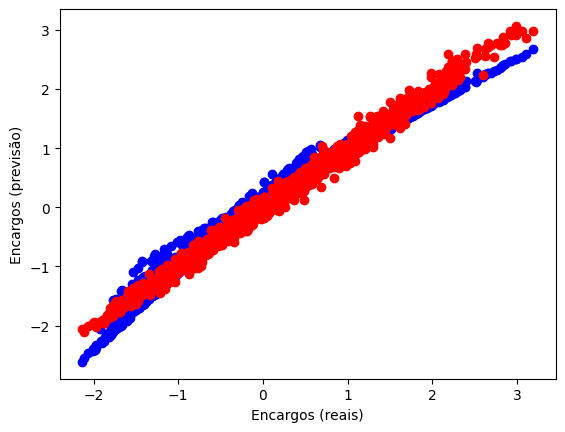

In [62]:
print("Regressão Linear:")
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_test, y_pred_lr))
print('Coeficiente de Determinação (R^2):', r2_score(y_test, y_pred_lr))
print('Erro Absoluto Médio (MAE):', mean_absolute_error(y_test, y_pred_lr))


print("\nÁrvore de Decisão:")
print('Erro Quadrático Médio (MSE):', mean_squared_error(y_test, y_pred_dtr))
print('Coeficiente de Determinação (R^2):', r2_score(y_test, y_pred_dtr))
print('Erro Absoluto Médio (MAE):', mean_absolute_error(y_test, y_pred_dtr))

print("\n")

plt.scatter(y_test, y_pred_lr, color="Blue", label="Regressão Linear")
plt.scatter(y_test, y_pred_dtr, color="Red", label="Árvore de Decisão")
plt.xlabel('Encargos (reais)')
plt.ylabel('Encargos (previsão)')
plt.show()